In [4]:
from temporal_default import *

Loading ..\..\counting\wos-soc-limitedtitles-cooc from disk...
Loading ..\..\counting\wos-econ-limitedtitles-cooc from disk...
1000 1000 terms from soc, econ


In [5]:
YWINDOW = 10
YSTEP = 1

In [6]:
"""
Pearson, Karl. “On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling”, Philosophical Magazine. Series 5. 50 (1900), pp. 157-175.

According to [3], the total number of samples is recommended to be greater than 13, 
    otherwise exact tests (such as Barnard’s Exact test) should be used because they do not overreject.
"""

'\nPearson, Karl. “On the criterion that a given system of deviations from the probable in the case of a correlated system of variables is such that it can be reasonably supposed to have arisen from random sampling”, Philosophical Magazine. Series 5. 50 (1900), pp. 157-175.\n\nAccording to [3], the total number of samples is recommended to be greater than 13, \n    otherwise exact tests (such as Barnard’s Exact test) should be used because they do not overreject.\n'

In [7]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [41]:
# contingency and expected table
def chi_stat(counter, t1, t2, yfrom, yto):
    
    ys = range(yfrom, yto)
    total = sum( counter(fy=y) for y in ys ) # accounting for undirected nature...
    
    ca = sum( counter(t=t1, fy=y) for y in ys ) # count of t1
    cb = sum( counter(t=t2, fy=y) for y in ys ) # count of t2
    cab = sum( counter(t1=t1, t2=t2, fy=y) for y in ys ) # count of them appearing together
    
    contingency = np.array([ 
        [cab, ca - cab],
        [cb - cab, total-(ca+cb)+cab]
    ])
    
    if np.any(contingency < 5):
        return +1.33
    
    if False:
        # I got different answers than chi2_contingency.
        # should check this method carefully before proceeding

        r = contingency.sum(axis=1)
        c = contingency.sum(axis=0)
        N = np.sum(r+c)

        expected = np.array([
            [ r[0]*c[0]/(N/2), r[0]*c[1]/(N/2) ],
            [ r[1]*c[0]/(N/2), r[1]*c[1]/(N/2) ]
        ])
        
        return np.sum( np.power(contingency - expected, 2) / expected )
    
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    diff = contingency / expected
    if diff[0,0] > diff[1,1]:
        sgn = +1 # together
    else:
        sgn = -1 # apart
    
    return sgn*p

In [42]:
def get_tnets( counter, focal ):
    rels_l = []
    for YY in range(YMIN, YMAX, YSTEP):
        myrels = [ chi_stat(counter, focal, term, YY, YY+YWINDOW) for term in counter.terms ]
        rels_l.append(myrels)
        
    return [np.array(x) for x in rels_l]

In [43]:
focal = 'behavior'

In [44]:
tn = get_tnets(cc_soc, focal)

In [45]:
tns = np.concatenate(tn)

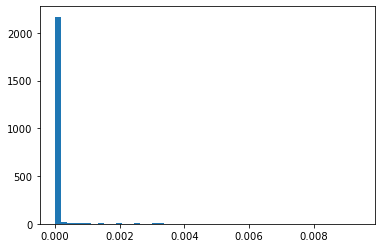

In [102]:
plt.hist(tns[np.abs(tns) < 0.01], bins=50);

In [103]:
for ti,t in enumerate(tn):
    print( YMIN + ti*YSTEP, "-", YMIN + ti*YSTEP + YWINDOW )
    #print(", ".join( [w for i,w in enumerate(cc_soc.terms) if 0 > t[i] > -0.00000000001] ))
    print(", ".join( [w for i,w in enumerate(cc_soc.terms) if 0 < t[i] < 0.00000000001] ))
    print()

1920 - 1930


1921 - 1931


1922 - 1932


1923 - 1933


1924 - 1934


1925 - 1935


1926 - 1936


1927 - 1937


1928 - 1938


1929 - 1939


1930 - 1940


1931 - 1941


1932 - 1942


1933 - 1943


1934 - 1944


1935 - 1945


1936 - 1946


1937 - 1947


1938 - 1948


1939 - 1949


1940 - 1950


1941 - 1951


1942 - 1952


1943 - 1953


1944 - 1954


1945 - 1955


1946 - 1956
study

1947 - 1957
study

1948 - 1958
study

1949 - 1959
study

1950 - 1960


1951 - 1961
attitudes, political, some, study

1952 - 1962
attitudes, political, study, theory

1953 - 1963
attitudes, political, premarital, some, study, theory

1954 - 1964
attitudes, political, some, theory

1955 - 1965
attitudes, political, theory, voting

1956 - 1966
attitudes, effects, political, sexual, study, theory, voting

1957 - 1967
attitudes, effects, religious, sexual, theory, voting

1958 - 1968
adolescent, attitudes, differences, religious, sexual, theory, voting

1959 - 1969
adolescent, attitudes, differences, effects, orga

In [104]:
ws = set()
wsets = []
for ti,t in enumerate(tn):
    myws = [w for i,w in enumerate(cc_soc.terms) if 0 < np.abs( t[i] ) < 0.000001]
    wsets.append(myws)
    
    ws.update(myws)

In [105]:
ws = sorted(ws)

In [106]:
ys = list(range(YMIN,YMAX,YSTEP))

In [107]:
w2i = {w:ws.index(w) for w in ws}

In [52]:
mat = np.zeros( ( len(ys), len(ws) ) )
for si,s in enumerate(wsets):
    for w in s:
        mat[ si, w2i[w] ] = 1

Text(0.5, 1.0, 'behavior')

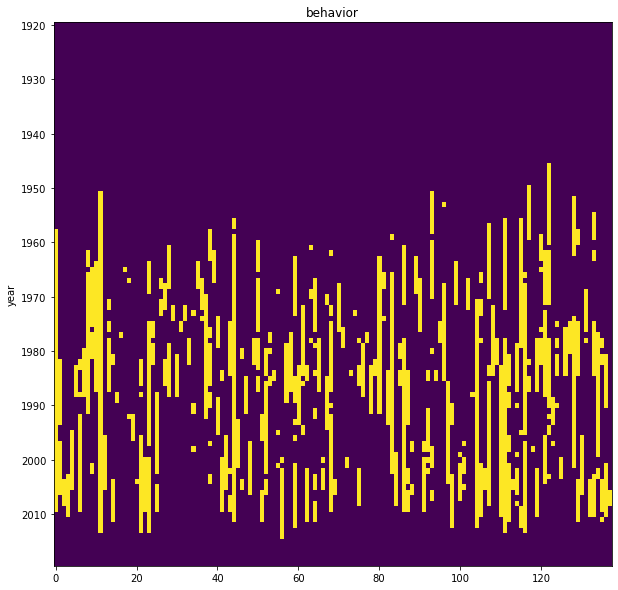

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(mat, interpolation='none', aspect='auto')
plt.ylabel('year')
plt.yticks(
    range(0,mat.shape[0],10),
    ys[::10]
);
plt.title(focal)

In [56]:
from sklearn.metrics.pairwise import euclidean_distances

In [167]:
ws = set()
wsets = []
for ti,t in enumerate(tn):
    myws = [w for i,w in enumerate(cc_soc.terms) if 0 < np.abs( t[i] ) < 0.001]
    wsets.append(myws)
    
    ws.update(myws)
ws = sorted(ws)

w2i = {w:ws.index(w) for w in ws}

In [206]:
mat = np.zeros( ( len(ys), len(ws) ) )
for si,s in enumerate(wsets):
    for w in s:
        mat[ si, w2i[w] ] = tn[ si ][ cc_soc.terms.index(w) ]

In [207]:
mat = mat / mat.max()

In [208]:
mat = -np.log( mat )

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [209]:
#mat[np.isinf(mat)] = mat[~np.isinf(mat)].max()
mat[np.isinf(mat)] = 0

(array([1.3667e+04, 3.2500e+02, 9.8000e+01, 5.6000e+01, 1.8000e+01,
        7.0000e+00, 6.0000e+00, 9.0000e+00, 5.0000e+00, 9.0000e+00]),
 array([  0.        ,  68.57660463, 137.15320926, 205.72981389,
        274.30641852, 342.88302316, 411.45962779, 480.03623242,
        548.61283705, 617.18944168, 685.76604631]),
 <a list of 10 Patch objects>)

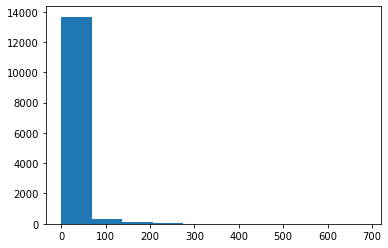

In [210]:
plt.hist(mat.flatten())

In [211]:
d = euclidean_distances(mat.T)

In [212]:
d.shape

(142, 142)

In [213]:
# reorder intelligently
order = [0]

while len(order) < mat.shape[1]:
    last = order[-1]
    sorts = list(np.argsort( d[order] ).flatten())
    cand = [x for x in sorts if x!=last and x not in order]
    order.append(cand[0])

In [214]:
mat.shape

(100, 142)

In [215]:
mat_sort = mat[:, order]

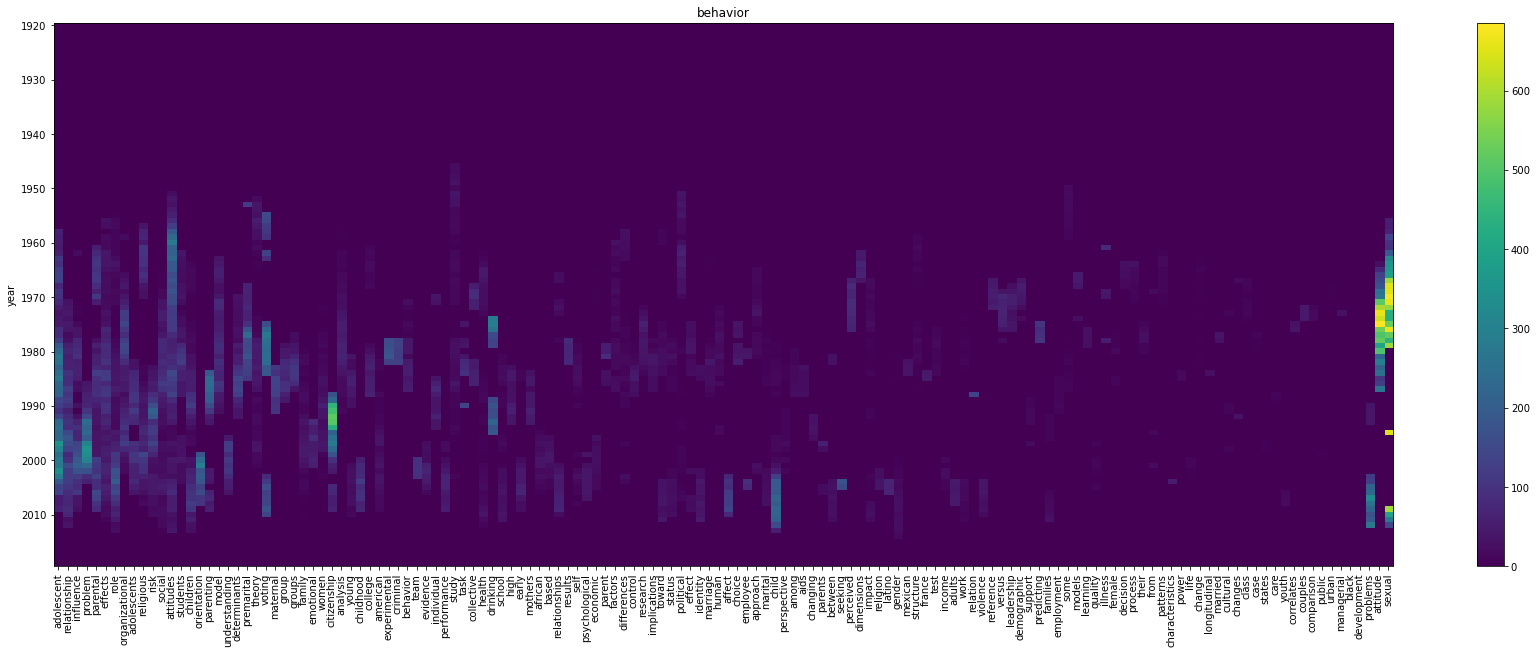

In [216]:
plt.figure(figsize=(30,10))

plt.imshow(mat_sort, interpolation='none', aspect='auto')
plt.ylabel('year')
plt.yticks(
    range(0,mat_sort.shape[0],10),
    ys[::10]
);
plt.xticks(
    range(mat.shape[1]),
    [ws[order[i]] for i in range(mat.shape[1])],
    rotation=90,
    fontsize=10
);
plt.title(focal)
plt.colorbar()

In [217]:
(
    np.sum( [cc_soc(t1='behavior', t2='attitudes', fy=YY) for YY in range(YMIN,YMIN+YWINDOW) ]),
    np.sum( [cc_soc(t='behavior', fy=YY) for YY in range(YMIN,YMIN+YWINDOW) ]),
    np.sum( [cc_soc(t='attitudes', fy=YY) for YY in range(YMIN,YMIN+YWINDOW)] )
)

(1, 8, 5)

In [55]:
yi

99

In [40]:
with open(f'chi2.temp.focal-{focal}.soc.csv', 'w', encoding='utf8') as outf:
    w = csv.writer(outf)
    w.writerow([ 't1','t2','p', 'neglogp', 'sign','y_start','y_end'])
    for YS in range(YMIN,YMAX,YSTEP):
        yi = (YS-YMIN)//YSTEP
        for ti,t in enumerate(cc_soc.terms):
            pvalue = tn[yi][ti]
            if not( 0 < np.abs(pvalue) < 0.00000000001 ):
                continue
                
            w.writerow([focal, t, pvalue, -np.log(pvalue*1e6), int(np.sign(pvalue)), YS, YS+YWINDOW])

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()
